In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
paths = pd.read_csv('./path_info_example.csv')

In [3]:
paths.head()

,Unnamed: 0,pre_slack,cur_slack,post_slack,pre_logic_lvl,cur_logic_lvl,post_logic_lvl,pre_data_delay,cur_data_delay,post_data_delay,clock_skew,startpoint,endpoint
0,0,-0.026,-0.019,-0.017,17,21,22,0.419,0.285,0.336,0.060,3aezy3kcpz,0yvjb4rnl7
1,1,-0.007,-0.028,-0.013,22,28,23,0.423,0.262,0.254,0.062,kcftsibcof,yodvkqtehc
2,2,-0.007,-0.014,-0.017,17,20,16,0.283,0.360,0.333,0.028,466eqgixau,9ak5yqftl3
3,3,-0.022,-0.013,-0.016,19,18,24,0.372,0.368,0.308,0.046,4kfhlsh2ga,wu8vhtj65i
4,4,-0.010,-0.024,-0.019,20,15,15,0.420,0.373,0.441,0.035,asac8a7a51,74r9njsu6z


In [4]:
paths.columns

Index(['Unnamed: 0', 'pre_slack', 'cur_slack', 'post_slack', 'pre_logic_lvl',
       'cur_logic_lvl', 'post_logic_lvl', 'pre_data_delay', 'cur_data_delay',
       'post_data_delay', 'clock_skew', 'startpoint', 'endpoint'],
      dtype='object')

In [5]:
paths = paths.drop(['Unnamed: 0'], axis=1)

In [6]:
paths.describe()

,pre_slack,cur_slack,post_slack,pre_logic_lvl,cur_logic_lvl,post_logic_lvl,pre_data_delay,cur_data_delay,post_data_delay,clock_skew
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.014913,-0.014592,-0.014378,21.968000,21.615000,22.027000,0.353373,0.350894,0.352798,0.049521
std,0.008512,0.008363,0.008668,4.376086,4.310842,4.377606,0.059208,0.056086,0.056761,0.018193
min,-0.029000,-0.029000,-0.029000,15.000000,15.000000,15.000000,0.250000,0.250000,0.250000,0.020000
25%,-0.022000,-0.021000,-0.022000,18.000000,18.000000,18.000000,0.298000,0.305000,0.304000,0.033000
50%,-0.015000,-0.015000,-0.014000,22.000000,21.000000,22.000000,0.357500,0.350000,0.355500,0.050000
75%,-0.007750,-0.008000,-0.007000,26.000000,25.000000,26.000000,0.409000,0.399000,0.398000,0.065250
max,-0.000000,-0.000000,-0.000000,29.000000,29.000000,29.000000,0.449000,0.449000,0.449000,0.079000


Find paths whose data path delay is bigger than average, and see what the worst path is

In [7]:
paths.loc[paths['cur_data_delay'] > paths['cur_data_delay'].mean()].sort_values(['cur_data_delay'], ascending=False).iloc[0]

pre_slack              -0.011
cur_slack               -0.01
post_slack              -0.01
pre_logic_lvl              17
cur_logic_lvl              17
post_logic_lvl             21
pre_data_delay          0.315
cur_data_delay          0.449
post_data_delay         0.352
clock_skew              0.079
startpoint         8piqsjyeec
endpoint           8uf2p3353l
Name: 326, dtype: object

In [8]:
paths['cur_logic_lvl'].mean()

21.615

In [9]:
paths['total data delay'] = paths['pre_data_delay'] + paths['cur_data_delay'] + paths['post_data_delay']
paths.head(5)

,pre_slack,cur_slack,post_slack,pre_logic_lvl,cur_logic_lvl,post_logic_lvl,pre_data_delay,cur_data_delay,post_data_delay,clock_skew,startpoint,endpoint,total data delay
0,-0.026,-0.019,-0.017,17,21,22,0.419,0.285,0.336,0.060,3aezy3kcpz,0yvjb4rnl7,1.040
1,-0.007,-0.028,-0.013,22,28,23,0.423,0.262,0.254,0.062,kcftsibcof,yodvkqtehc,0.939
2,-0.007,-0.014,-0.017,17,20,16,0.283,0.360,0.333,0.028,466eqgixau,9ak5yqftl3,0.976
3,-0.022,-0.013,-0.016,19,18,24,0.372,0.368,0.308,0.046,4kfhlsh2ga,wu8vhtj65i,1.048
4,-0.010,-0.024,-0.019,20,15,15,0.420,0.373,0.441,0.035,asac8a7a51,74r9njsu6z,1.234


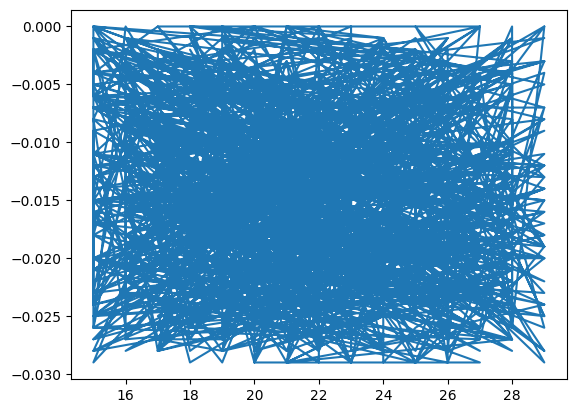

In [10]:
plt.plot(paths['cur_logic_lvl'], paths['cur_slack'])